# Test

This notebook is just to test stuff.

In [1]:
import numpy as np
import re
import torch
import pandas as pd
import matplotlib.pyplot as plt

from nltk.corpus import stopwords
from typing import List
from collections import Counter

In [2]:
example = """I thought this was a wonderful way to spend time on a too hot summer, sitting in the air conditioned theaterand watching a light-hearted comedy.
I thought it was proof tha Woody Allen is still fully in control of the style many of us have grown to love.
This may not be the crown jewel of his career, but it was wittier than 'Devil Wears Prada' and more interesting than 'Superman' a great comedy to go see with friends.
"""

In [3]:
def preprocess_string(s: str) -> str:
	# remove all non-word characters (everything except numbers and letters)
	s = re.sub(r"[^\w\s]", '', s)
	# replace all the runs of whitespaces with no space
	s = re.sub(r"\s+", '', s)
	# replace digits with no space
	s = re.sub(r"\d", '', s)
	return s

def padding(sentences: List[int], seq_len: int) -> np.ndarray:

	# create a np zeros of 
	features = np.zeros((len(sentences), seq_len), dtype=int)
	for i, review in enumerate(sentences):
		if (len(review) != 0):
			features[i, -len(review):] = np.array(review)[:seq_len]

	return features

def tokenize(x_train: List[str]) -> np.ndarray:
	
	word_list = []
	
	# stop_words' example: ['hers', 'than', 'then', 'isn', 'shan't', etc.]
	stop_words = set(stopwords.words('english'))
	
	# iterate through each sentence
	for sentence in x_train:

		if len(sentence.lower().split()) == 0:
			continue
		
		# iterate through each word
		for word in sentence.lower().split():

			# clean the word
			word = preprocess_string(word)

			# if the words have not appeared in stop words -> add the word in the word list
			if word not in stop_words and word != '':
				word_list.append(word)

	# create a corpus of all the words
	corpus = Counter(word_list)
	print(corpus)
	
	# sort on the basis of most common words
	corpus_ = sorted(corpus, key=corpus.get, reverse=True)
	print(corpus_)

	# creating a dict - this acts as a vocabulary
	onehot_dict = {w: i+1 for i,w in enumerate(corpus_)}
	print(onehot_dict)

	# tokenize
	final_list_train = []
	# iterate through each sentence
	for sentence in x_train:

		if len(sentence.lower().split()) == 0:
			continue

		ls = []

		# iterate through each word
		for word in sentence.lower().split():

			# clean the word
			word = preprocess_string(word)

			# word exists in vocabulary
			if (word in onehot_dict.keys()):

				# get the index based on the vocabulary
				idx = onehot_dict[word]

				# append the index to ls
				ls.append(idx)

		# append the ls to the final list
		final_list_train.append(ls)
	
	# display
	# for list_train in final_list_train:
	# 	print(list_train)

	# pad
	final_list_train = padding(final_list_train, 16)
	print(final_list_train)

	return final_list_train

tokenize(example.split("\n"))

Counter({'thought': 2, 'comedy': 2, 'wonderful': 1, 'way': 1, 'spend': 1, 'time': 1, 'hot': 1, 'summer': 1, 'sitting': 1, 'air': 1, 'conditioned': 1, 'theaterand': 1, 'watching': 1, 'lighthearted': 1, 'proof': 1, 'tha': 1, 'woody': 1, 'allen': 1, 'still': 1, 'fully': 1, 'control': 1, 'style': 1, 'many': 1, 'us': 1, 'grown': 1, 'love': 1, 'may': 1, 'crown': 1, 'jewel': 1, 'career': 1, 'wittier': 1, 'devil': 1, 'wears': 1, 'prada': 1, 'interesting': 1, 'superman': 1, 'great': 1, 'go': 1, 'see': 1, 'friends': 1})
['thought', 'comedy', 'wonderful', 'way', 'spend', 'time', 'hot', 'summer', 'sitting', 'air', 'conditioned', 'theaterand', 'watching', 'lighthearted', 'proof', 'tha', 'woody', 'allen', 'still', 'fully', 'control', 'style', 'many', 'us', 'grown', 'love', 'may', 'crown', 'jewel', 'career', 'wittier', 'devil', 'wears', 'prada', 'interesting', 'superman', 'great', 'go', 'see', 'friends']
{'thought': 1, 'comedy': 2, 'wonderful': 3, 'way': 4, 'spend': 5, 'time': 6, 'hot': 7, 'summer': 

array([[ 0,  0,  1,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14,  2],
       [ 0,  0,  0,  1, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26],
       [ 0, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37,  2, 38, 39, 40]])

In [4]:
# no layers = 3
# batch size = 7
# no of features = 5
test = torch.randint(low=0, high=10, size=((3, 7, 5)))
# print(test)
print(test.shape)

# we want to reduce to (3, 2, 5) by averaging each feature across the batch size
target = 2

no_layers = test.shape[0]
current_batch_size = test.shape[1]
no_features = test.shape[2]

new_test = torch.zeros((no_layers, target, no_features))
for i in range(no_layers):
	
	n = current_batch_size // target
	for j in range(target):

		t = test[i, n*j:n*(j+1), :].float()
		if (j == target - 1):
			t = test[i, n*j:, :].float()
		
		mean_t = torch.mean(t, dim=0)
		new_test[i][j] = mean_t

print(new_test)

# below method does not work
test = test.float()
test = torch.mean(test, dim=1)
print(test)

torch.Size([3, 7, 5])
tensor([[[4.6667, 5.3333, 6.0000, 4.0000, 5.6667],
         [4.7500, 5.2500, 1.0000, 6.2500, 4.0000]],

        [[3.0000, 7.3333, 3.0000, 4.3333, 5.3333],
         [6.0000, 1.5000, 5.7500, 6.0000, 4.0000]],

        [[3.6667, 1.0000, 3.0000, 4.0000, 6.0000],
         [6.0000, 5.2500, 3.2500, 6.7500, 3.5000]]])
tensor([[4.7143, 5.2857, 3.1429, 5.2857, 4.7143],
        [4.7143, 4.0000, 4.5714, 5.2857, 4.5714],
        [5.0000, 3.4286, 3.1429, 5.5714, 4.5714]])


In [5]:
test = torch.zeros((10,3))
if (torch.cuda.is_available()):
	test = test.to('cuda')
test = test.cpu().numpy()

print(test.shape)

test1 = np.ones((5,3))
print(test1)

test[0:5, :] = test1
print(test)

import pandas as pd
df = pd.DataFrame({
	'images': ['1.jpg', '2.jpg'],
	'captions': ['lol', 'yea'],
	'class 1': [1, 0],
	'class 2': [1, 1],
	'class 3': [0, 1],
})
df.columns[2:].to_list()

(10, 3)
[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]
[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


/home/reynardo/.local/lib/python3.10/site-packages/torch/cuda/__init__.py:118: UserWarning: CUDA initialization: CUDA unknown error - this may be due to an incorrectly set up environment, e.g. changing env variable CUDA_VISIBLE_DEVICES after program start. Setting the available devices to be zero. (Triggered internally at ../c10/cuda/CUDAFunctions.cpp:108.)
  return torch._C._cuda_getDeviceCount() > 0


['class 1', 'class 2', 'class 3']

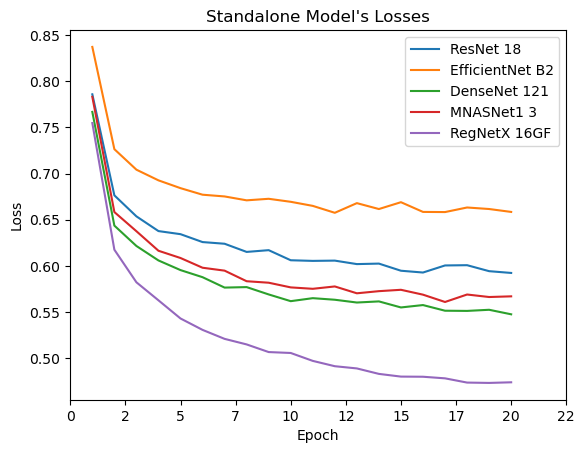

In [6]:
cnn_only_model_losses = pd.read_csv("../logs/cnn_only_models_losses")

resnet18 = cnn_only_model_losses['resnet18'].to_numpy()
efficientnetb2 = cnn_only_model_losses['efficientnet_b2'].to_numpy()
densenet121 = cnn_only_model_losses['densenet121'].to_numpy()
mnasnet13 = cnn_only_model_losses['mnasnet1_3'].to_numpy()
regnet = cnn_only_model_losses['regnet_x_1_6gf'].to_numpy()
epochs = np.arange(1, 21, step=1).astype(int)

plt.title("Standalone Model's Losses")
plt.plot(epochs, resnet18, label='ResNet 18')
plt.plot(epochs, efficientnetb2, label='EfficientNet B2')
plt.plot(epochs, densenet121, label='DenseNet 121')
plt.plot(epochs, mnasnet13, label='MNASNet1 3')
plt.plot(epochs, regnet, label='RegNetX 16GF')
plt.legend()
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.xticks(ticks=plt.xticks()[0], labels=plt.xticks()[0].astype(int))
plt.show()

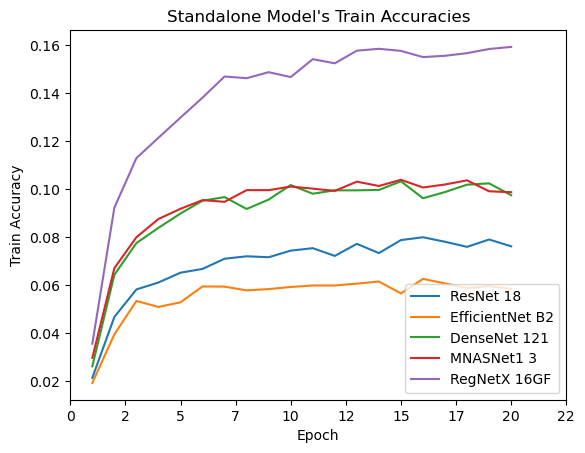

In [7]:
cnn_only_model_train_accuracies = pd.read_csv("../logs/cnn_only_models_train_accuracies")

resnet18 = cnn_only_model_train_accuracies['resnet18'].to_numpy()
efficientnetb2 = cnn_only_model_train_accuracies['efficientnet_b2'].to_numpy()
densenet121 = cnn_only_model_train_accuracies['densenet121'].to_numpy()
mnasnet13 = cnn_only_model_train_accuracies['mnasnet1_3'].to_numpy()
regnet = cnn_only_model_train_accuracies['regnet_x_1_6gf'].to_numpy()
epochs = np.arange(1, 21, step=1).astype(int)

plt.title("Standalone Model's Train Accuracies")
plt.plot(epochs, resnet18, label='ResNet 18')
plt.plot(epochs, efficientnetb2, label='EfficientNet B2')
plt.plot(epochs, densenet121, label='DenseNet 121')
plt.plot(epochs, mnasnet13, label='MNASNet1 3')
plt.plot(epochs, regnet, label='RegNetX 16GF')
plt.legend()
plt.ylabel("Train Accuracy")
plt.xlabel("Epoch")
plt.xticks(ticks=plt.xticks()[0], labels=plt.xticks()[0].astype(int))
plt.show()

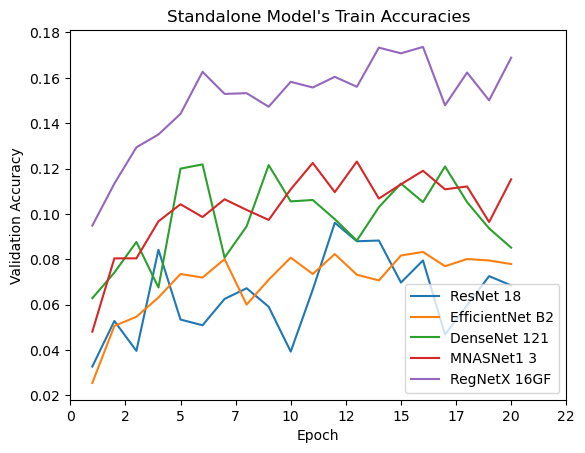

In [8]:
cnn_only_model_val_accuracies = pd.read_csv("../logs/cnn_only_models_val_accuracies")
resnet18 = cnn_only_model_val_accuracies['resnet18'].to_numpy()
efficientnetb2 = cnn_only_model_val_accuracies['efficientnet_b2'].to_numpy()
densenet121 = cnn_only_model_val_accuracies['densenet121'].to_numpy()
mnasnet13 = cnn_only_model_val_accuracies['mnasnet1_3'].to_numpy()
regnet = cnn_only_model_val_accuracies['regnet_x_1_6gf'].to_numpy()
epochs = np.arange(1, 21, step=1).astype(int)

plt.title("Standalone Model's Validation Accuracies")
plt.plot(epochs, resnet18, label='ResNet 18')
plt.plot(epochs, efficientnetb2, label='EfficientNet B2')
plt.plot(epochs, densenet121, label='DenseNet 121')
plt.plot(epochs, mnasnet13, label='MNASNet1 3')
plt.plot(epochs, regnet, label='RegNetX 16GF')
plt.legend()
plt.ylabel("Validation Accuracy")
plt.xlabel("Epoch")
plt.xticks(ticks=plt.xticks()[0], labels=plt.xticks()[0].astype(int))
plt.show()

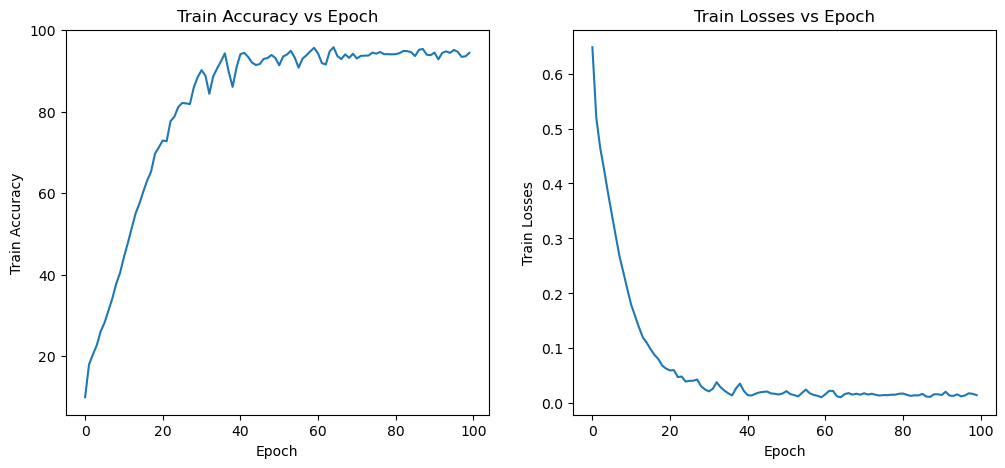

In [54]:
import pandas as pd
import matplotlib.pyplot as plt

combine_model_no_dropout = pd.read_csv("../logs/combined_no_dropout_100_epochs.csv")

train_accs = combine_model_no_dropout['Train Accuracies']
train_losses = combine_model_no_dropout['Train Losses']

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.title("Train Accuracy vs Epoch")
plt.plot(train_accs)
plt.ylabel("Train Accuracy")
plt.xlabel("Epoch")

plt.subplot(1, 2, 2)
plt.title("Train Losses vs Epoch")
plt.plot(train_losses)
plt.ylabel("Train Losses")
plt.xlabel("Epoch")

plt.show()